# DSCI 100 002 Project Proposal

## The Identification of Patients with Heart Disease in Hungary According to Age, Resting Blood Pressure, and Maximum Heart Rate.
##### Kevin Peng, Davina Deng

## Introduction

Heart disease, also named cardiovascular disease, is characterized by a broad scope of medical conditions that negatively affect human hearts which incorporates serious coronary artery disease, rheumatic heart disease and even a variety of complicated issues with regards to the blood vessel system. There is an abundance of factors that may increase the risk of patients being diagnosed with heart disease, such as age, resting blood pressure, maximum heart rate, etc. The high level of cholesterol retained in the human body is also likely to be vulnerable to heart disease and severely influence the human health (Hassan et al., 2022).

The resting blood pressure is identified as the elevated force exerted on arterial walls by the circulation of blood when the heart is resting between normal beats. Since the force has been applied, the pressure on the heart may be increased accordingly, and the heart may work harder to satisfy normal breathing regulation and blood circulation (Singh & Kumar, 2020). In the long term, this body activity may result in the thickness of the heart tissue and unexpected damage to the arterial walls and eventually cause heart failure. As discovered in the previous study that with an increase in the resting blood pressure, patients are more likely to suffer from heart disease (Hassan et al., 2022).

This project is designed to examine the identification of potential patients with heart disease in Hungary based on the relationship between age, resting blood pressure and maximum heart rate. The question that will be addressed in this project is: **Are the patients in Hungary likely to suffer from heart disease according to age, resting blood pressure and maximum heart rate achieved?** The following data analysis, wrangling, and K-nearest neighbours algorithm will be employed to demonstrate how these factors can respond to the question and are strongly correlated. 

All variables in the dataset are as follows:

1. age: age (years old)
2. sex: sex (1 = male and 0 = female)
3. cp: chest pain 
4. trestbps: resting blood pressure (mm/Hg)
5. chol: serum cholesterol (mg/dl)
6. fbs: fasting blood sugar > 120 mg/dl (1 = True and 0 = False)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: whether exercise induced angina (1 = True and 0 = False)
10. oldpeak: ST depression induced by exercise, relative to rest
11. slope: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. num: diagnosis of heart disease (angiographic disease status) (1,2,3,4 = presence, 50% diameter narrowing ; 0 = no presence, 50% diameter narrowing)

There are 294 rows in total in the dataset and we will be using `age` `trestbps` and `thalach` as predictors in this project.

## Preliminary exploratory data analysis

In [145]:
# Library packages import
library(tidyverse)
library(repr)
library(RColorBrewer)
library(tidymodels)
library(ggplot2)
library(scales)

# Formatting for generated graphs
options(repr.plot.width = 11, repr.plot.height = 6)

Use `read_csv()` to load the "processed.hungarian.data" dataset from the online directory in course GitHub.

In [146]:
# Read the dataframe using the URL and assign the column names

url <- "https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.hungarian.data"

hungary_data <- read_csv(url, col_names = FALSE)
head(hungary_data)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0


#### Adding column names
The dataframe does not come with column names, so those must be added. Some factor columns are also being read as <dbl> or <chr>, so those need to be changed as well.

In [147]:
colnames(hungary_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                            "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
hungary_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0
32,1,2,125,254,0,0,155,0,0,?,?,?,0
33,1,3,120,298,0,0,185,0,0,?,?,?,0


A new column, named "heart_disease" was appended as an indicator to determine whether the patients suffer from heart disease. The patients with heart disease show "TRUE", whereas the patients without heart disease show "FALSE".

In [148]:
# Cleaning, Wrangling and making the dataset tidy.
# Classify categorical variables into integers.
hungary_data[hungary_data == "?"] <- NA
hungary_clean <- hungary_data |>
    mutate(heart_disease = ifelse((num > 0), TRUE, FALSE)) |>
    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
           fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
           exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
           ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope)))

Now the data is tidy, that each observation has its own row, with each column referencing a single variable, and each cell containing one value.

#### Dataset splitting

In [149]:
# The original dataframe needs to be split into two parts of dataset, which are training dataset and testing dataset
hungary_data_split <- hungary_clean|>
    initial_split(hungary_clean, 
                  prop = 3/4, 
                  strata = num)
hungary_data_training <- training(hungary_data_split)
hungary_data_testing <- testing(hungary_data_split)
hungary_data_training

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease
<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<fct>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,FALSE
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0,FALSE
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0,FALSE
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0,FALSE
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0,FALSE
32,1,2,125,254,0,0,155,0,0,NA,NA,NA,0,FALSE
33,1,3,120,298,0,0,185,0,0,NA,NA,NA,0,FALSE
34,0,2,130,161,0,0,190,0,0,NA,NA,NA,0,FALSE
35,0,4,140,167,0,0,150,0,0,NA,NA,NA,0,FALSE


At this point, the original dataset has been split into two separate parts, which are training dataset and testing dataset. The following coding represents the summarization of the training dataset.

#### Summarizing the dataset

In [150]:
# Summarizing the "hungary_data_training" dataset to obtain the maximum, minimum, and mean values of the variables used in this project
hungary_data_summarized <- hungary_data_training |>
    group_by(heart_disease) |>
    summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps), 
              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
              number_of_patients = n())
hungary_data_summarized

Warning message:
“There were 4 warnings in `summarize()`.
The first warning was:
ℹ In argument: `mean_trestbps = mean(trestbps)`.
ℹ In group 1: `heart_disease = FALSE`.
Caused by warning in `mean.default()`:
! argument is not numeric or logical: returning NA
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


heart_disease,min_age,max_age,mean_age,min_trestbps,max_trestbps,mean_trestbps,min_thalach,max_thalach,mean_thalach,number_of_patients
<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
FALSE,28,62,46.91489,NA,NA,NA,NA,NA,NA,141
TRUE,31,66,49.69620,100,200,NA,100,99,NA,79


At this point, we have finished summarizing the "hungary_data_training" dataset and are ready to use this dataset again to create a scatter plot for a better visualization.

### Dataset Visualization

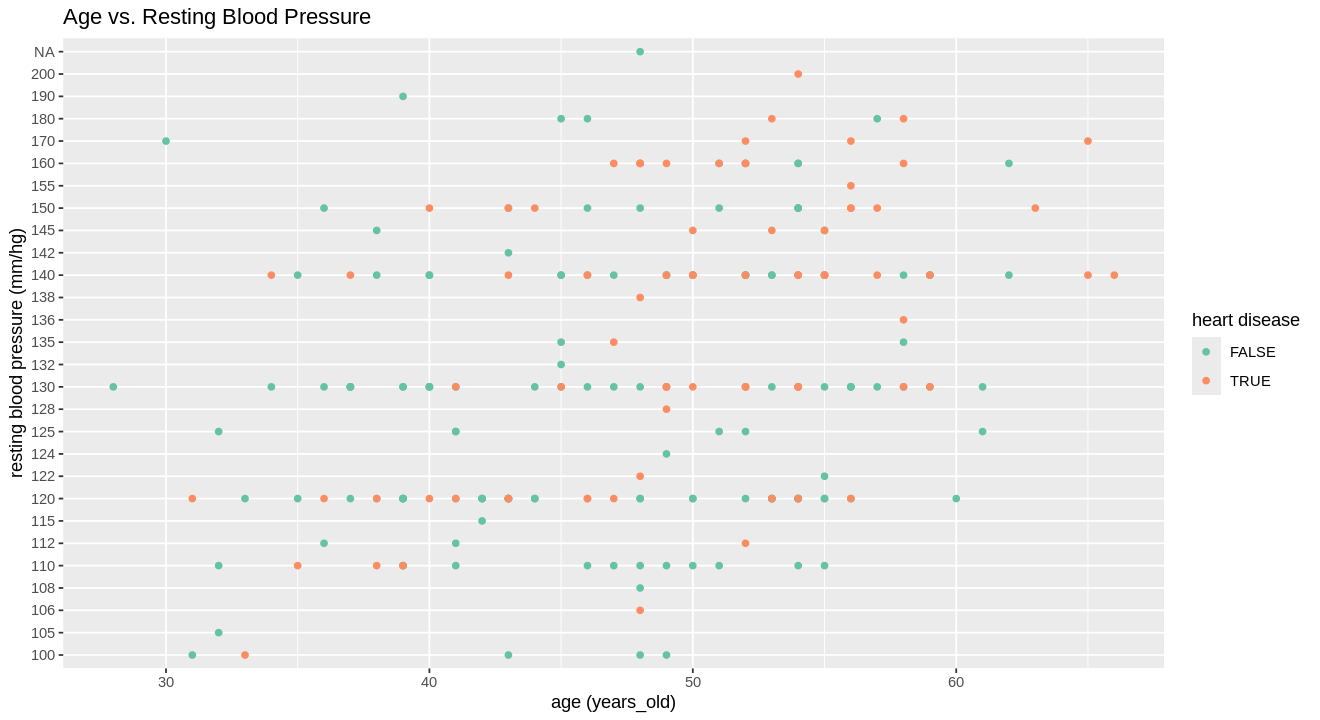

In [151]:
# Use the "hungary_data_training" dataset to create a plot to demonstrate a better visualization and compare the distributions of the variables I use in this project.

plot_A <- ggplot(hungary_data_training, aes(x = age, y = trestbps, color = heart_disease)) +
    geom_point() +
    labs(x = "age (years_old)", 
         y = "resting blood pressure (mm/hg)", 
         color = "heart disease") +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Age vs. Resting Blood Pressure")
plot_A

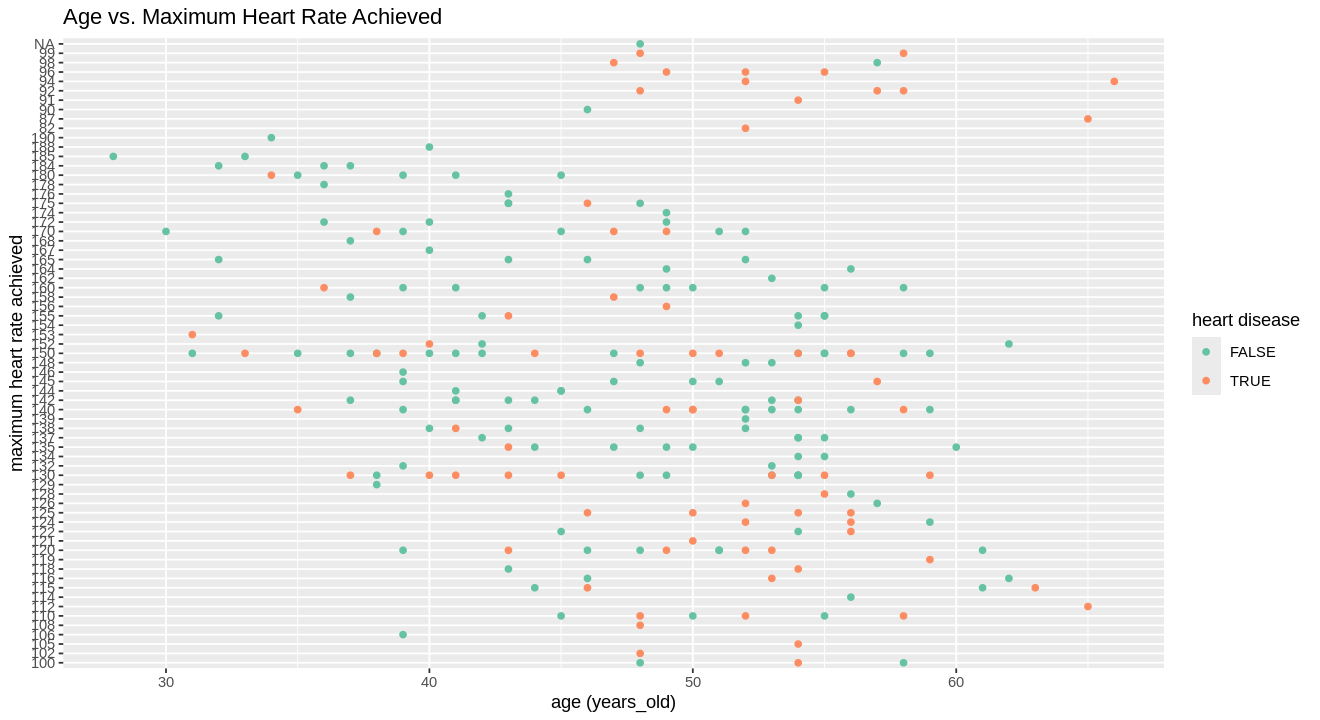

In [152]:
plot_B <- ggplot(hungary_data_training, aes(x = age, y = thalach, color = heart_disease)) +
    geom_point() +
    labs(x = "age (years_old)", 
         y = "maximum heart rate achieved", 
         color = "heart disease") +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Age vs. Maximum Heart Rate Achieved")
plot_B

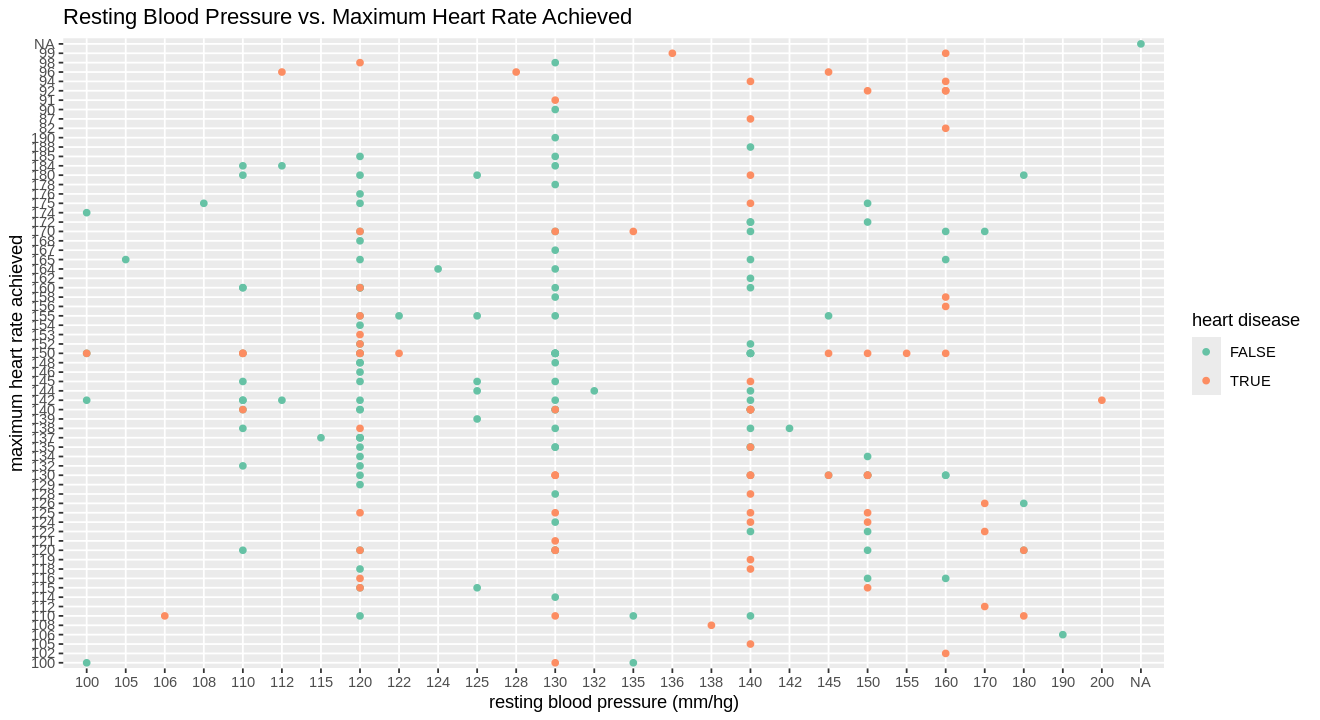

In [153]:
plot_C <- ggplot(hungary_data_training, aes(x = trestbps, y = thalach, color = heart_disease)) +
    geom_point() +
    labs(x = "resting blood pressure (mm/hg)", 
         y = "maximum heart rate achieved", 
         color = "heart disease") +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Resting Blood Pressure vs. Maximum Heart Rate Achieved")
plot_C

## Methods

Here are the methods that were employed to conduct the data analysis:

1. The raw dataset has been found from the course GitHub and imported to the Jupyter Notebook.
2. Library packages were loaded and the data frame was read.
3. As can be seen in the raw dataset, there are 303 rows x 14 columns of data with some missing values marked as "?". All of the missing values displayed as "?" have been switched to "NA".
4. A new column, named "heart_disease" was appended as an indicator to determine whether the patients suffer from heart disease. The patients with heart disease show "TRUE", whereas the patients without heart disease show "FALSE".
5. The entire dataset was split into two separate datasets, using initial_split(), into a training dataset and a testing dataset.
6. Then we summarized the training data, we grouped by heart_disease then summarized for the minimum, maximum and mean of each of age, trestbps and thalach. We do this to make sure the data of patients with and without heart is different (averages of age, trestbps, and thalach are different).
7. We generated three different scatter plots using the summarized data. As can be seen above, the first scatter plot showcases the relationship between age and resting blood pressure, the second scatter plot shows the relationship between age and maximum heart rate and the last scatter plot shows the relationship between resting blood pressure and maximum heart rate. 

### Expected outcomes and significance

1. **What do you expect to find?**

We expect to find that patients with heart disease are likely to have a high maximum heart rate, high resting blood pressure, and in older age.

2. **What impact could such findings have?**

With the Heart Disease Classification model, patients with heart disease will be easily and accurately identified. This may avoid the delayed remedy.


3. **What future questions could this lead to?**
   
a. What suggestions can be given to people who may have risks of having heart disease?

b. Considering all the variables in the entire dataset, is the maximum heart rate more likely to cause heart disease or the high resting blood pressure more likely to cause heart disease?

### Reference

Hassan, Ch. A. ul, Iqbal, J., Irfan, R., Hussain, S., Algarni, A. D., Bukhari, S. S. H., Alturki, N., & Ullah, S. S. (2022b, September 23). Effectively predicting the presence of coronary heart disease using machine learning classifiers. MDPI. https://www.mdpi.com/1424-8220/22/19/7227  

Heart disease prediction using machine learning algorithms | IEEE conference publication | IEEE Xplore. (n.d.). https://ieeexplore.ieee.org/abstract/document/9122958 

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.
